In [5]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

# Đọc dữ liệu
df=pd.read_csv('Supply Chain.csv')

# Kiểm tra dữ liệu
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

Dự đoán số lượng sản phẩm bán ra (Number of products sold)

In [8]:
# Chọn các cột liên quan
X = df[['Price', 'Availability', 'Stock levels', 'Lead times', 'Order quantities']]
y = df['Number of products sold']

# Chia tập dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng mô hình Random Forest để dự đoán
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model_rf.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2 Score: {r2}')


MSE: 108305.93362499998
R^2 Score: -0.13490726243483797


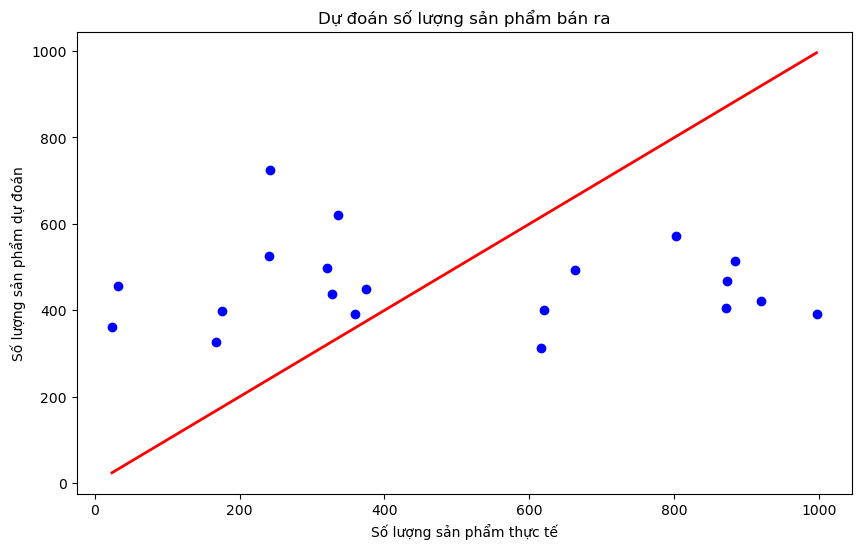

In [10]:
# Trực quan hóa kết quả dự đoán vs giá trị thực tế
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Đường tham chiếu
plt.xlabel('Số lượng sản phẩm thực tế')
plt.ylabel('Số lượng sản phẩm dự đoán')
plt.title('Dự đoán số lượng sản phẩm bán ra')
plt.show()


Tối ưu hóa chi phí vận chuyển (Shipping costs)

In [13]:
# Chọn các cột liên quan
X = df[['Shipping times', 'Shipping carriers', 'Transportation modes', 'Routes']]
X = pd.get_dummies(X, drop_first=True)  # Biến đổi dữ liệu phân loại thành số
y = df['Shipping costs']

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng hồi quy tuyến tính
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Dự đoán
y_pred = model_lr.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2 Score: {r2}')


MSE: 7.885183728427667
R^2 Score: -0.21279681207638568


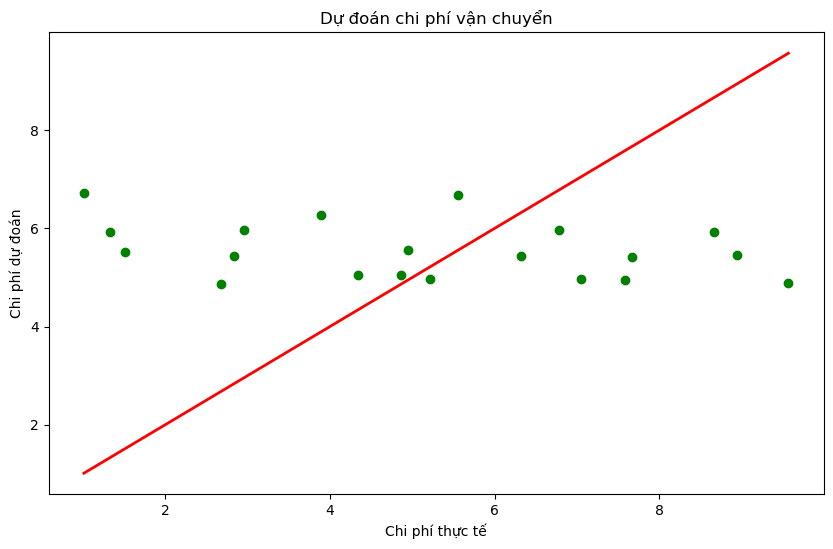

In [15]:
# Trực quan hóa chi phí vận chuyển dự đoán vs thực tế
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Đường tham chiếu
plt.xlabel('Chi phí thực tế')
plt.ylabel('Chi phí dự đoán')
plt.title('Dự đoán chi phí vận chuyển')
plt.show()


 Dự đoán doanh thu (Revenue generated)

In [18]:
# Chọn các cột liên quan
X = df[['Product type', 'Price', 'Number of products sold', 'Customer demographics']]
X = pd.get_dummies(X, drop_first=True)
y = df['Revenue generated']

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Dự đoán
y_pred = model_rf.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2 Score: {r2}')


MSE: 8836863.203991052
R^2 Score: -0.0996428267001368


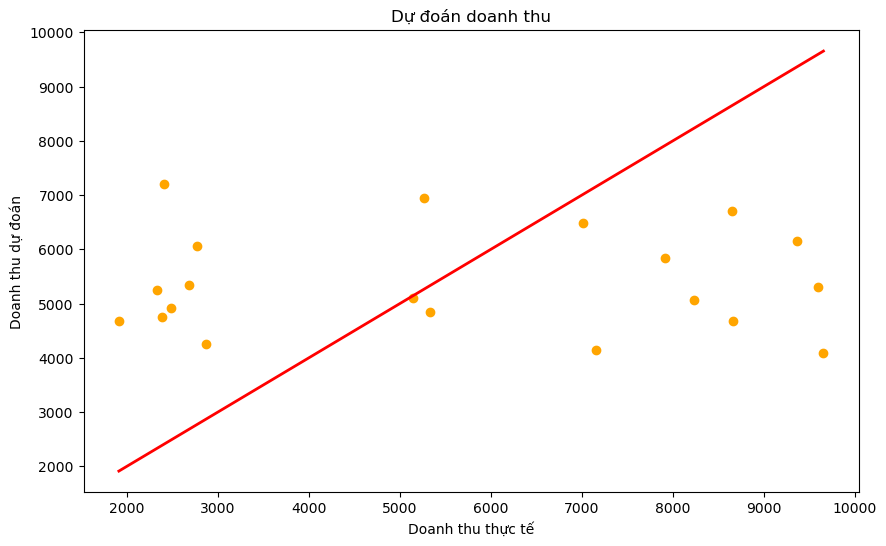

In [20]:
# Trực quan hóa doanh thu dự đoán vs thực tế
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Đường tham chiếu
plt.xlabel('Doanh thu thực tế')
plt.ylabel('Doanh thu dự đoán')
plt.title('Dự đoán doanh thu')
plt.show()


Phát hiện sản phẩm có lỗi (Defect rates)

In [23]:
# Chọn các cột liên quan
X = df[['Manufacturing costs', 'Inspection results', 'Lead time', 'Supplier name']]
X = pd.get_dummies(X, drop_first=True)
y = (df['Defect rates'] > 0.05).astype(int)  # Đặt ngưỡng lỗi, ví dụ > 5% được coi là lỗi

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Dự đoán
y_pred = model_rf.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


C:\Users\thanh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


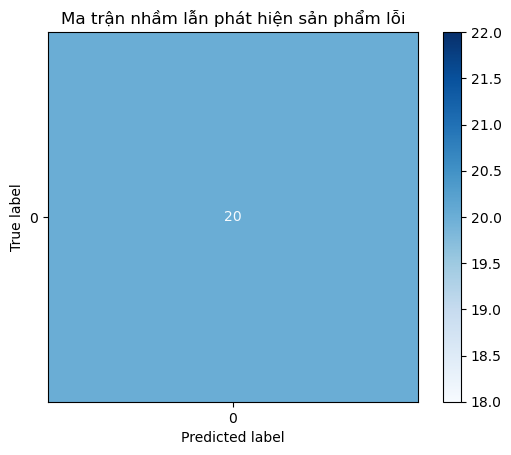

In [25]:
# Trực quan hóa biểu đồ cột kết quả phân loại
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ma trận nhầm lẫn để xem độ chính xác của phân loại
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Ma trận nhầm lẫn phát hiện sản phẩm lỗi')
plt.show()


Dự báo mức tồn kho (Stock levels)

In [28]:
# Chọn các cột liên quan
X = df[['Lead time', 'Order quantities', 'Production volumes']]
y = df['Stock levels']

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sử dụng mô hình Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Dự đoán
y_pred = model_rf.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2 Score: {r2}')


MSE: 1130.33846
R^2 Score: -0.008186574619144293


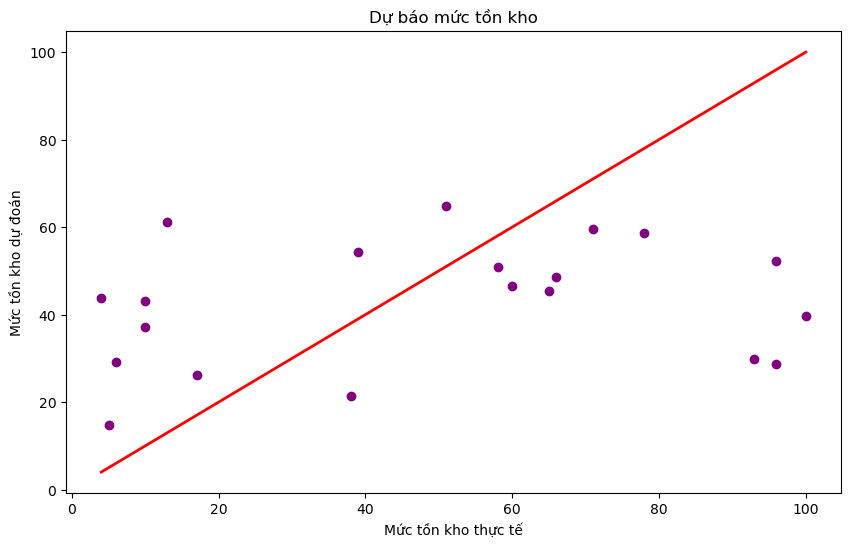

In [30]:
# Trực quan hóa dự báo mức tồn kho
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Đường tham chiếu
plt.xlabel('Mức tồn kho thực tế')
plt.ylabel('Mức tồn kho dự đoán')
plt.title('Dự báo mức tồn kho')
plt.show()


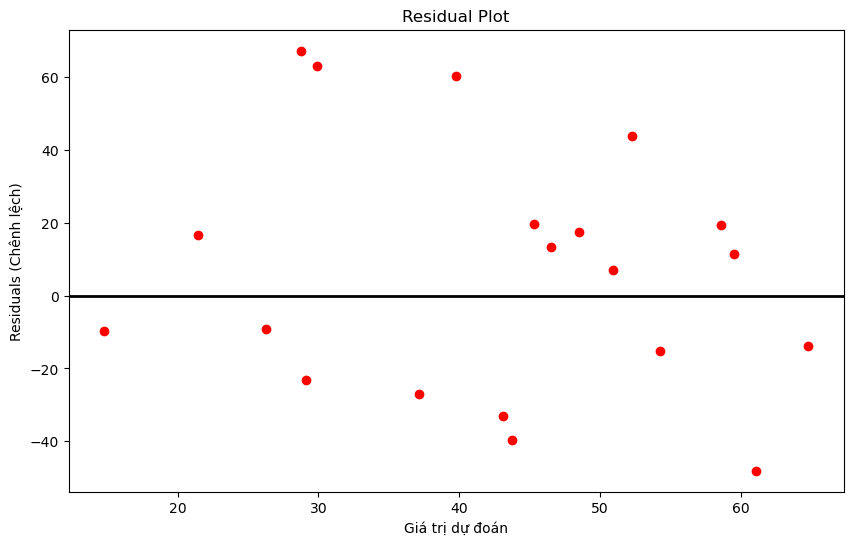

In [32]:
# Trực quan hóa residual plot cho bất kỳ mô hình nào
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='black', lw=2)
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Residuals (Chênh lệch)')
plt.title('Residual Plot')
plt.show()
